In [1]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from prol.process import get_cycle

In [41]:
class SetParams:
    def __init__(self, dict) -> None:
        for k, v in dict.items():
            setattr(self, k, v)

def plotting(y, ci, labels, args, trange, name):
    if type(trange) is list:
        time = np.arange(trange[0], trange[1])
    else:
        time = np.arange(args.t, args.t + trange)

    N = args.N
    
    assert time[0] > args.t
    y = y[:, time-args.t]
    ci = ci[:, time-args.t]

    fig, ax = plt.subplots(figsize=(15, 5))
    for i, label in enumerate(labels):
        ax.plot(time, y[i], lw=2, label=label)
        ax.fill_between(time, y[i]-ci[i], y[i]+ci[i], alpha=0.2)

    unit = get_cycle(N)
    pattern = np.array((unit * math.ceil((time[-1])/(2*N))))[time].astype("bool")

    for i in time[pattern]:
        ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.2, edgecolor=None, facecolor="blue"))
    for i in time[~pattern]:
        ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.2, edgecolor=None, facecolor="orange"))

    ax.set_xlabel("time")
    ax.set_ylabel("instantaneous risk")
    ax.set_ylim([0.0, 1.0])
    ax.set_xlim([time[0], time[-1]])

    ax.legend(loc=1)

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='orange', alpha=0.2, label='task A: MNIST zero/one images labeled as 0/1'),
        Patch(facecolor='blue', alpha=0.2, label='task B: MNIST two/three images labeled as 0/1')
    ]
    fig.legend(handles=legend_elements, loc=8, bbox_to_anchor=(0.5, -0.18), frameon=False)

    plt.show()


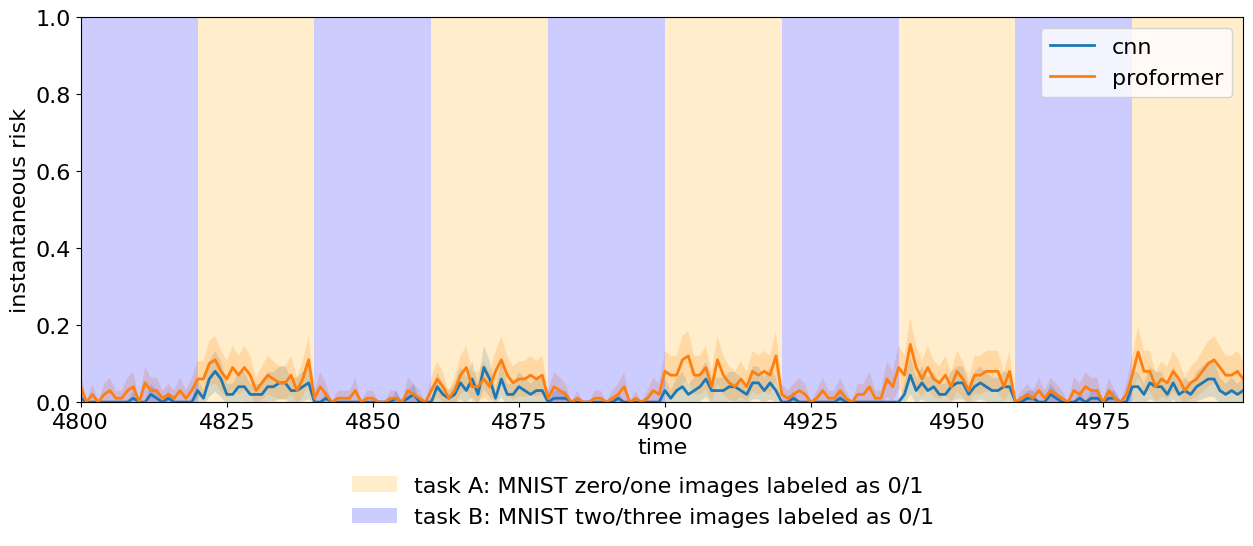

In [42]:
path = 'experiments/ABAB/multirun/2024-05-06/mnist-cnn/6'
with open(path + '/outputs.pkl', 'rb') as f:
    mnist_outputs = pickle.load(f)

path = 'experiments/ABAB/multirun/2024-05-07/mnist-proformer/4'
with open(path + '/outputs.pkl', 'rb') as f:
    proformer_outputs = pickle.load(f)

args = SetParams(mnist_outputs['args'])
y = np.array([mnist_outputs['inst_risk'], proformer_outputs['inst_risk']])
ci = np.array([mnist_outputs['ci'], proformer_outputs['ci']])
labels = ['cnn', 'proformer']
plotting(y, ci, labels, args, [4800, 5000], 'test')

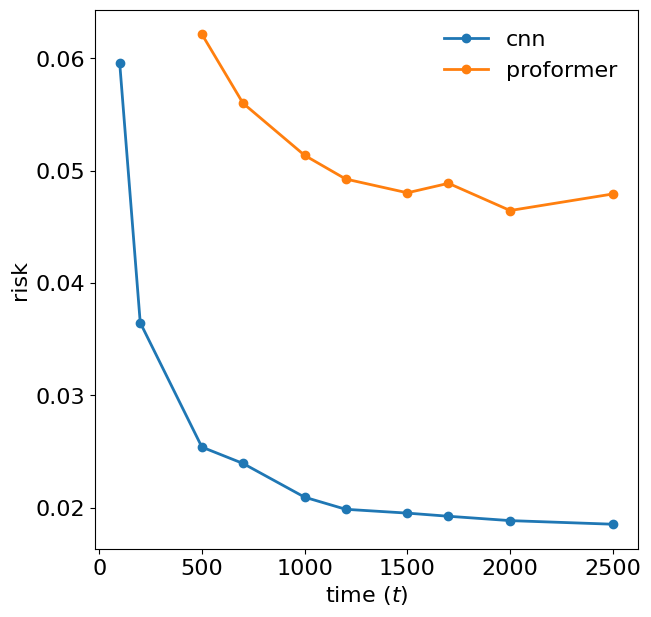

In [43]:
fig, ax = plt.subplots(figsize=(7, 7))

time_list = []
risk_list = []
for i in range(10):
    fname = f'experiments/ABAB/multirun/2024-05-06/mnist-cnn/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='cnn')

time_list = []
risk_list = []
for i in range(8):
    fname = f'experiments/ABAB/multirun/2024-05-07/mnist-proformer/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='proformer')

ax.set_xlabel(r"time ($t$)")
ax.set_ylabel(r"risk")
ax.legend(frameon=False)
plt.show()